In [3]:
import pandas as pd

In [4]:
tabela = pd.read_csv("cancelamentos.csv")

In [5]:
tabela.head()

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,349936.0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,100634.0,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,301263.0,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,119358.0,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,130955.0,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0


In [6]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              50000 non-null  float64
 1   idade                   50000 non-null  float64
 2   sexo                    49997 non-null  object 
 3   tempo_como_cliente      49998 non-null  float64
 4   frequencia_uso          50000 non-null  float64
 5   ligacoes_callcenter     50000 non-null  float64
 6   dias_atraso             50000 non-null  float64
 7   assinatura              50000 non-null  object 
 8   duracao_contrato        50000 non-null  object 
 9   total_gasto             50000 non-null  float64
 10  meses_ultima_interacao  50000 non-null  float64
 11  cancelou                50000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 4.6+ MB


In [7]:
tabela.columns

Index(['CustomerID', 'idade', 'sexo', 'tempo_como_cliente', 'frequencia_uso',
       'ligacoes_callcenter', 'dias_atraso', 'assinatura', 'duracao_contrato',
       'total_gasto', 'meses_ultima_interacao', 'cancelou'],
      dtype='object')

In [9]:
tabela['duracao_contrato'].value_counts()

duracao_contrato
Annual       20157
Quarterly    19959
Monthly       9884
Name: count, dtype: int64

In [15]:
duracao_contrato = {
    'Annual': 'Anual',
    'Quarterly': 'Trimestral',
    'Monthly': 'Mensal'
}
tabela['duracao_contrato'] = tabela['duracao_contrato'].replace(duracao_contrato)
tabela['duracao_contrato'].value_counts()


duracao_contrato
Anual         20157
Trimestral    19959
Mensal         9884
Name: count, dtype: int64

In [16]:
tabela['cancelou'].value_counts()

cancelou
1.0    28394
0.0    21606
Name: count, dtype: int64

<Axes: title={'center': 'Duração do contrato'}, xlabel='duracao_contrato'>

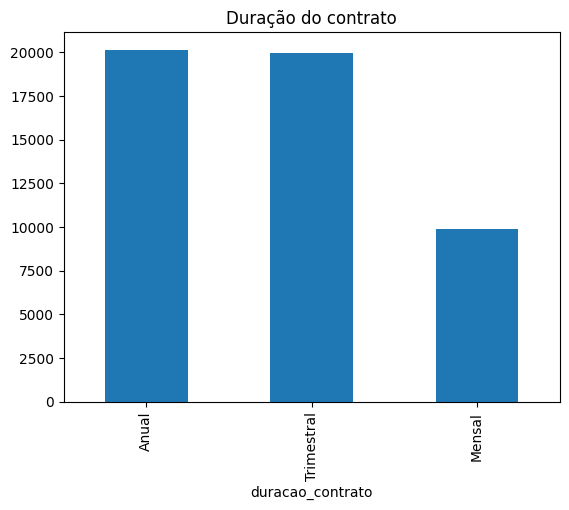

In [18]:
tabela['duracao_contrato'].value_counts().plot(kind='bar', title='Duração do contrato')

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Influência do Call Center na Taxa de Cancelamento')

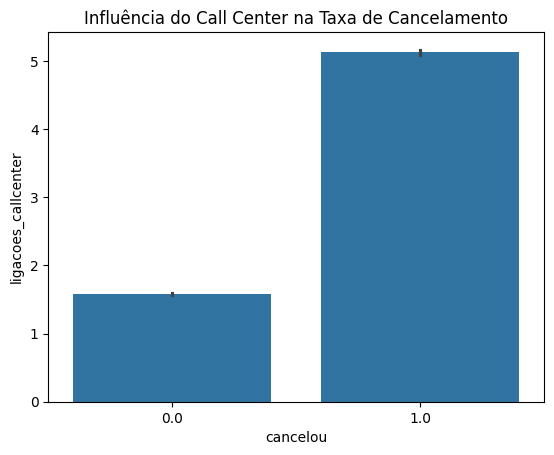

In [33]:
ax = sns.barplot(data=tabela, x='cancelou', y='ligacoes_callcenter', estimator='mean')
ax.set_title('Influência do Call Center na Taxa de Cancelamento')

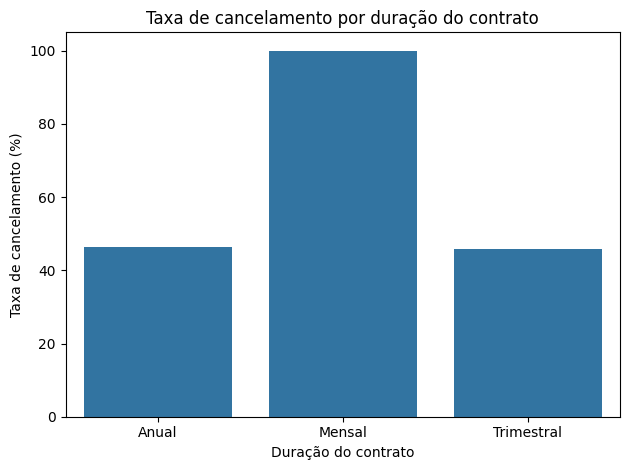

In [50]:
# Calcular taxa de cancelamento por duração de contrato (em %)
taxa = tabela.groupby('duracao_contrato')['cancelou'].mean().reset_index()
taxa['cancelou'] = taxa['cancelou'] * 100
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(data=taxa, x='duracao_contrato', y='cancelou')
ax.set_title('Taxa de cancelamento por duração do contrato')
ax.set_ylabel('Taxa de cancelamento (%)')
ax.set_xlabel('Duração do contrato')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Número de Ligações para o Call Center'}, xlabel='ligacoes_callcenter'>

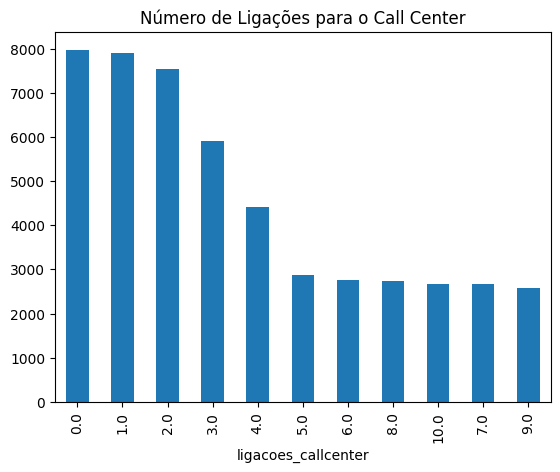

In [ ]:
# 7893 clientes ligaram para o call center apenas 1x
tabela['ligacoes_callcenter'].value_counts().plot(kind='bar', title='Número de Ligações para o Call Center')

C:\Users\gabri\AppData\Local\Temp\ipykernel_14684\1571338398.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_calls = tabela.groupby(['duracao_contrato', 'ligacoes_bin'])['cancelou'].mean().reset_index()


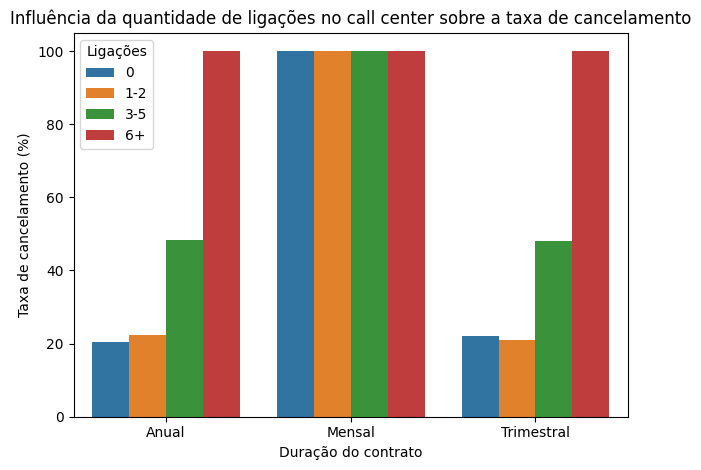

In [ ]:
# categorizar número de ligações em bins e calcular taxa de cancelamento por categoria
bins = [-1, 0, 2, 5, tabela['ligacoes_callcenter'].max()]
#divide o numero de ligações em 4 categorias: 0, 1-2, 3-5, 6+
labels = ['0', '1-2', '3-5', '6+'] #da nome para cada categoria
tabela['ligacoes_bin'] = pd.cut(tabela['ligacoes_callcenter'], bins=bins, labels=labels) #cria a nova coluna com as categorias

taxa_calls = tabela.groupby(['duracao_contrato', 'ligacoes_bin'])['cancelou'].mean().reset_index()
taxa_calls['cancelou'] = taxa_calls['cancelou'] * 100  # em porcentagem

ax = sns.barplot(data=taxa_calls, x='duracao_contrato', y='cancelou', hue='ligacoes_bin')
ax.set_title('Influência da quantidade de ligações no call center sobre a taxa de cancelamento')
ax.set_ylabel('Taxa de cancelamento (%)')
ax.set_xlabel('Duração do contrato')
plt.legend(title='Ligações')
plt.tight_layout()
plt.show()